In [2]:
# info on dataset: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.random import set_seed

# setting seeds for numpy for reproducible results 
np.random.seed(2)

# setting seeds for tensorflow 
set_seed(2)

In [4]:
#read in data
sonar = pd.read_csv('../input/mines-vs-rocks/sonar.all-data.csv')
# Print dataframe
sonar

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [5]:
# Create input and output variables
# Output is titled R in row 61 and has the label rock (R) or metal (M)
y = sonar.R
X = sonar.iloc[:, 0:60]

In [6]:
# check number of metal(mines) and rock values. This is done to determine what performance metric to use
# Accuracy can be used when the class distribution is similar while F1-score is a better metric when the classes are imbalanced classes
# Accuracy can be used here since its close to 50/50 distribution
y.value_counts()

M    111
R     96
Name: R, dtype: int64

In [7]:
# Preprocessing 
# Encode y variable into binary integer 0 or 1
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

#scaleinputs, distribution will have a mean value 0 and standard deviation of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
from sklearn.model_selection import train_test_split

# split into test train sets
# stratif, this insures classes are evenly represented across splits
X_train, X_test, y_train, y_test = \
    train_test_split(X_scaled, encoded_y, stratify=encoded_y, train_size=0.85)

# train sets into into validation and train sets
X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train, y_train, stratify=y_train, train_size=0.85)

input_shape = [X_train.shape[1]]

In [9]:
# define model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape= input_shape),
    
    layers.Dense(256, activation='relu', ),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu', ),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
 
    layers.Dense(1, activation='sigmoid'),
])


In [10]:
# Add Optimizer, Loss, and Metric

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [11]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

Epoch 1/100
3/3 [==============================] - 2s 293ms/step - loss: 0.7149 - binary_accuracy: 0.5938 - val_loss: 0.6407 - val_binary_accuracy: 0.7037
Epoch 2/100
3/3 [==============================] - 0s 43ms/step - loss: 0.5681 - binary_accuracy: 0.7115 - val_loss: 0.6062 - val_binary_accuracy: 0.7407
Epoch 3/100
3/3 [==============================] - 0s 33ms/step - loss: 0.4263 - binary_accuracy: 0.8029 - val_loss: 0.5569 - val_binary_accuracy: 0.7407
Epoch 4/100
3/3 [==============================] - 0s 33ms/step - loss: 0.2909 - binary_accuracy: 0.8549 - val_loss: 0.5139 - val_binary_accuracy: 0.7778
Epoch 5/100
3/3 [==============================] - 0s 33ms/step - loss: 0.2256 - binary_accuracy: 0.9170 - val_loss: 0.4747 - val_binary_accuracy: 0.7778
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.2450 - binary_accuracy: 0.9070 - val_loss: 0.4503 - val_binary_accuracy: 0.7778
Epoch 7/100
3/3 [==============================] - 0s 32ms/step - loss: 0.1

Text(0.5, 0, 'Epoch #')

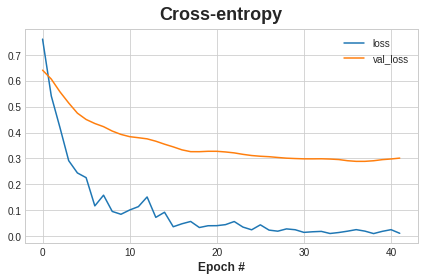

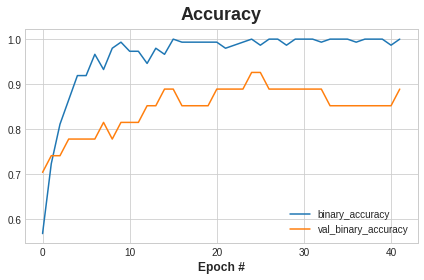

In [12]:
# Set up callback funtcion. This stops the model from training further when performance starts to decrease/taper off
# This helps prevent overfitting 
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=50,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
plt.xlabel('Epoch #')
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
plt.xlabel('Epoch #')

In [13]:
# Print best validation loss and accuarcy
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

Best Validation Loss: 0.2887
Best Validation Accuracy: 0.9259


In [14]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data


NameError: name 'x_test' is not defined